# Part 2 Running models

# Capstone Index

    
+    [Part 1.1 Data Munging Tesla Stock Data](./Stock_dayofweek_10_14_2018.ipynb)
+    [Part 1.2 Data Munging Elon Musk Twitter Data](./Tweets_dayofweek_10_14_2018.ipynb)
+    [Part 1.3 Scrapping the SEC](./Web_Scraper_2_10_16_2018_clean.ipynb)
+    [Part 1.4 Merging all the data into one csv file](./Merging_the_data_3_10_18_2018_clean.ipynb)
+    [Part 2 Running models](./Modeling_5_10_19_2018 .ipynb)
+    [Part 2.1 Running more models](./Running_more_models_10_19_2018.ipynb)

## Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics

%matplotlib inline

## Importing the dataframe

In [2]:
df = pd.read_csv('../Elon_Musk_Tweet_Requence_Compaired_To_Tesla_Stock_First_Run_Through/Merging_the_data_3_10_18_2018_clean')

## Fixing what appears to be a data entry bug

In [3]:
df[df['stock_day_of_week'] ==23]

,stock_date,stock_close,stock_volume,stock_open,stock_high,stock_low,stock_day_of_week,year,tweet_id,tweet_created_at,tweet_text,tweet_day_of_week,tweet_times_a_day,filings,year.1
2084,2010-06-29,23.89,18751150.0,19.0,25.0,17.54,23.0,2010/06/29,0.0,0,0,0.0,0.0,none,none


In [4]:
df.loc[2084,'stock_day_of_week'] = 2

In [5]:
df['stock_day_of_week'].value_counts()

2.0    428
3.0    428
4.0    421
5.0    419
1.0    389
Name: stock_day_of_week, dtype: int64

## Droping extra date columns

In [6]:
df.drop(columns = 'year.1', inplace = True)

## Creating stock Price delta column

In [7]:
df.head()

,stock_date,stock_close,stock_volume,stock_open,stock_high,stock_low,stock_day_of_week,year,tweet_id,tweet_created_at,tweet_text,tweet_day_of_week,tweet_times_a_day,filings
0,2018-10-08,250.56,13371180.0,264.52,267.7599,249.00,1.0,2018/10/08,0.0,0,0,0.0,0.0,8-K
1,2018-10-05,261.95,17900710.0,274.65,274.8800,260.00,5.0,2018/10/05,0.0,0,0,0.0,0.0,SC 13G/A
2,2018-10-04,281.83,9638885.0,293.95,294.0000,277.67,4.0,2018/10/04,0.0,0,0,0.0,0.0,8-K
3,2018-10-03,294.80,7982272.0,303.33,304.6000,291.57,3.0,2018/10/03,0.0,0,0,0.0,0.0,8-K
4,2018-10-02,301.02,11699690.0,313.95,316.8400,299.15,2.0,2018/10/02,0.0,0,0,0.0,0.0,8-K


In [8]:
# other way of doing it
#df['stock_price_delta'] = df['stock_close']
#for i in range(0, len(df['stock_open']), 1):
#    df['stock_price_delta'] = df['stock_open'] - df['stock_close']

In [9]:
df['stock_price_delta'] = df['stock_open']-df['stock_close']

## Creating a new dataframe with SEC filings shift back a day
#### as most SEC filings where put in after trading hours closed for the day

In [10]:
df2 = df.copy()

In [11]:
def conv(n):
    if n <= 4:
        return n + 1
    else:
        return 1

In [12]:
df2['stock_day_of_week'] = df2['stock_day_of_week'].map(conv)

## Creating dummies for
### stock_day_of_week and filings

In [13]:
#df['filings'].unique()

In [14]:
#df.filings.value_counts()

In [15]:
# Creating dummies for the day of the week ['stock_day_of_week'] and dropping the first dummy column, which is Monday
df_withdummies = pd.get_dummies(df, prefix=['weekday_d'], columns=['stock_day_of_week'],drop_first = True)
# SEC date pushed back one day
df2_withdummies = pd.get_dummies(df2, prefix=['weekday_d'], columns=['stock_day_of_week'],drop_first = True)

In [16]:
# Creating dummies for filings ['filings'] and dropping the first dummy column
df_withdummies = pd.get_dummies(df_withdummies, prefix=['filings_d'], columns=['filings'],drop_first = True)
# SEC date pushed back one day
df2_withdummies = pd.get_dummies(df2_withdummies, prefix=['filings_d'], columns=['filings'],drop_first = True)

In [17]:
# Making X just the values I want, which are
# the number of Elon Musk tweets a day ['tweet_times_a_day']
# which day of the week it is
# if there was an SEC filing that day and if so what type
X = df_withdummies.iloc[:,11:]
# SEC date pushed back one day
X2 = df2_withdummies.iloc[:,11:]
# Just ['stock_price_delta']
X3 = df2_withdummies.iloc[:,12]

In [18]:
df_withdummies.iloc[:,11:].head()

,tweet_times_a_day,stock_price_delta,weekday_d_2.0,weekday_d_3.0,weekday_d_4.0,weekday_d_5.0,filings_d_10-K/A,filings_d_10-Q,filings_d_424B5,filings_d_425,...,filings_d_PX14A6G,filings_d_S-3ASR,filings_d_S-4,filings_d_S-4/A,filings_d_S-8,filings_d_SC 13G,filings_d_SC 13G/A,filings_d_SD,filings_d_UPLOAD,filings_d_none
0,0.0,13.96,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,12.70,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.0,12.12,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,8.53,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,12.93,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Shifting back Price Delta by a day


In [19]:
X4 = X3.copy()

In [20]:
# shift the price delta back a day
i = 0
while i < 2084:
    X4[i] = X4[(i+1)]
    i += 1

In [21]:
# setting my last value to the mean
X4[2084] = X4.mean()

In [22]:
#for i in range(len(X4), 0, -1):
#    print('adsf')

In [23]:
X4.keys()

RangeIndex(start=0, stop=2085, step=1)

In [24]:
X3 = pd.DataFrame({'stock_price_delta': X3})
X4 = pd.DataFrame({'stock_price_delta': X4})

## Making a dataframe with all my values with SEC filings and stock delta date shifted
#### SEC filings were shift to the day after as most filling are filed after the trading hours
#### and the stock delta between open and close was moved back a day so it would act a predictor

In [25]:
X5 = X2.copy()

In [26]:
X5['stock_price_delta'] = X4['stock_price_delta']

## Saving for use modeling in another file

In [27]:
pd.DataFrame(X).to_csv('features_df_dummies_10_19_2018', index = False)

In [28]:
# SEC date pushed back one day
pd.DataFrame(X2).to_csv('features_df2_dummies_10_19_2018', index = False)

In [29]:
# All features with dummies with SEC filings and stock price delta date shifted
pd.DataFrame(X5).to_csv('features_X5_10_19_2018', index = False)

In [30]:
pd.DataFrame(df_withdummies['stock_volume']).to_csv('target_df_10_19_2018', index = False)

## Train test split

In [31]:
X = X # The features I want
X2 = X2 # The features with date shifted SEC filings
X3 = X3 # only price delta as feature
X4 = X4 # only price delta shift back a day as a feature
y = df_withdummies['stock_volume'] # My target

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)

In [34]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.3, random_state=42)

In [35]:
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size=0.3, random_state=42)

In [36]:
X5_train, X5_test, y_train, y_test = train_test_split(X5, y, test_size=0.3, random_state=42)

## Adding a standarization on my features

In [37]:
from sklearn import preprocessing

In [38]:
Xs = preprocessing.scale(X)

In [39]:
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=42)

## Modeling Linear Regression

In [40]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

In [41]:
lm = linear_model.LinearRegression()

In [42]:
# All the features with dummies
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
metrics.r2_score(predictions, y_test) # 0 = 100%

-13.332995617986981

In [43]:
# modeling with standardized features
model = lm.fit(Xs_train, y_train)
predictions = lm.predict(Xs_test)
metrics.r2_score(predictions, y_test) # 0 = 100%

-0.0032023218732615266

In [44]:
# All features with dummies with date shifted SEC filings
model = lm.fit(X2_train, y_train)
predictions = lm.predict(X2_test)
metrics.r2_score(predictions, y_test) # 0 = 100%

-13.33299561798704

In [45]:
# Only the price delta as a feature
model = lm.fit(X3_train, y_train)
predictions = lm.predict(X3_test)
metrics.r2_score(predictions, y_test) # 0 = 100%

-717.726102246918

In [46]:
# Only the price delta shift back a day as a feature
model = lm.fit(X4_train, y_train)
predictions = lm.predict(X4_test)
metrics.r2_score(predictions, y_test) # 0 = 100%

-9983.030125977326

In [47]:
# All features with dummies with SEC filings and stock price delta date shifted
model = lm.fit(X5_train, y_train)
predictions = lm.predict(X5_test)
metrics.r2_score(predictions, y_test) # 0 = 100%

-13.536325166646582

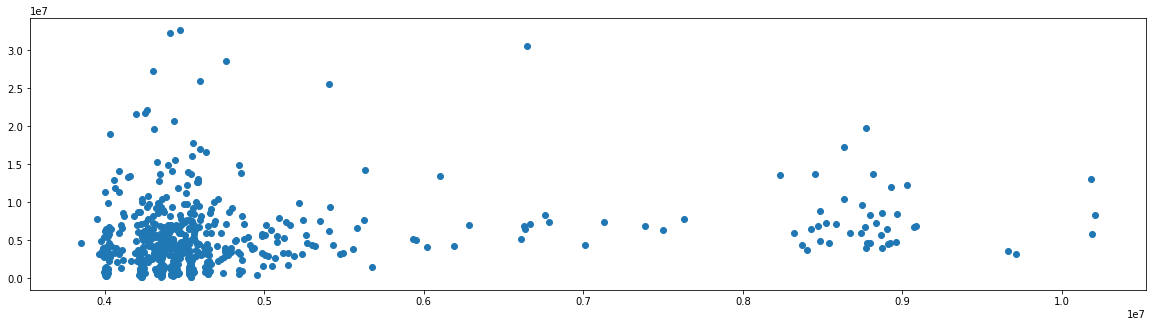

In [48]:
plt.figure(figsize=(20,5))
plt.scatter(predictions, y_test)

In [49]:
lm.intercept_ # intercept = Monday

6678495.086706085

In [50]:
pd.DataFrame(lm.coef_, index = X.columns)

,0
tweet_times_a_day,1.034710e+05
stock_price_delta,9.911302e+03
weekday_d_2.0,5.318908e+05
weekday_d_3.0,3.441943e+05
weekday_d_4.0,4.159080e+05
weekday_d_5.0,2.196705e+05
filings_d_10-K/A,-1.779671e+06
filings_d_10-Q,1.436330e+06
filings_d_424B5,-4.708838e+05
filings_d_425,8.703411e+04


## Modeling Random Forest

In [51]:
rf = RandomForestRegressor()

In [52]:
# All the features with dummies
rf_model = rf.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.1897175265722505

In [53]:
# All the features with dummies standardized
rf_model = rf.fit(Xs_train, y_train)
rf_model.score(Xs_test, y_test)

0.1716597188660521

In [54]:
# All features with dummies with date shifted SEC filings
rf_model = rf.fit(X2_train, y_train)
rf_model.score(X2_test, y_test)

0.19390871486984596

In [55]:
# Only the price delta as a feature
rf_model = rf.fit(X3_train, y_train)
rf_model.score(X3_test, y_test)

0.025099894208634344

In [56]:
# Only the price delta shift back a day as a feature
rf_model = rf.fit(X4_train, y_train)
rf_model.score(X4_test, y_test)

-0.03353515148481079

In [57]:
# All features with dummies with SEC filings and stock price delta date shifted
rf_model = rf.fit(X5_train, y_train)
rf_model.score(X5_test, y_test)

0.09407198154951203

In [58]:
rf_pred = rf_model.predict(X5_test)

In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
rf_pred

array([  962791.6       ,  2054042.66666667,  1629977.8       ,
        2350125.51666667,  2378815.46666667,  3754666.2       ,
        4034359.8       ,  9872628.7       ,  1277622.4       ,
       12165701.        ,  4757383.2       ,   769290.08      ,
         952475.9       ,  3549162.5       ,  6041912.9       ,
        2846192.09166667, 11096757.1       ,  4019326.2       ,
        2851005.05      ,  6286837.4       ,  2360702.        ,
       10434236.3       ,  3205424.6       ,  3828274.4       ,
        6450232.3       ,  5775919.1       ,  3464681.2       ,
        6458326.9       ,  1049901.8       ,  3394525.4       ,
        7693732.2       ,  4406390.4       ,  1165298.7       ,
        6706811.9       ,   687750.6       ,  9809001.8       ,
         949043.8       ,  1094067.4       ,  1403887.65      ,
        5638730.45      ,  6113146.4       ,  2480099.22      ,
        5635822.7       ,   835173.        ,  3731135.3       ,
        2952929.65      ,  4936034.7    

In [61]:
mean_squared_error(y_test, rf_pred)

19607656203323.2

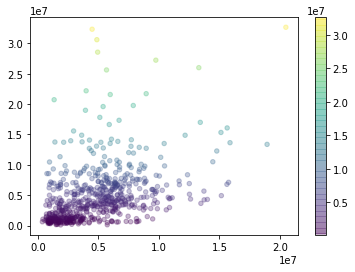

In [62]:
x = rf_pred
y = y_test
colors = y_test
sizes = 20

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

(0, 30000000)

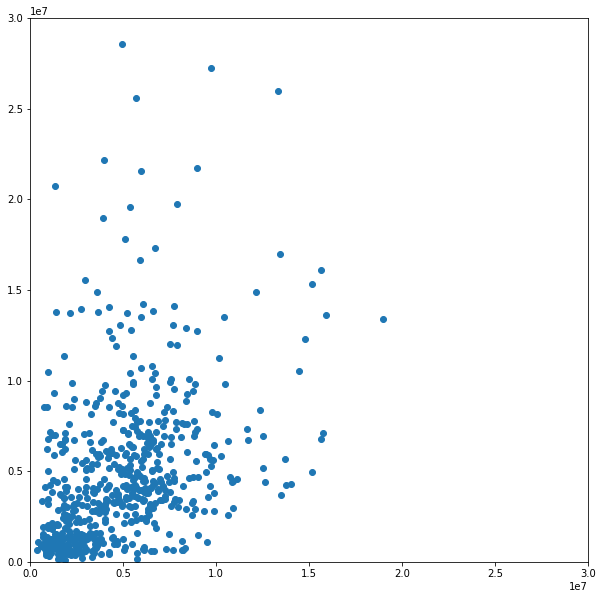

In [63]:
plt.figure(figsize=(10,10))
plt.scatter(rf_pred, y_test)
plt.ylim(0,30000000)
plt.xlim(0,30000000)

## Modeling Lasso Regression

notes to self: A super important fact we need to notice about ridge regression is that it enforces the β coefficients to be lower, but it does not enforce them to be zero. That is, it will not get rid of irrelevant features but rather minimize their impact on the trained model.

The only difference from Ridge regression is that the regularization term is in absolute value. But this difference has a huge impact on the trade-off we’ve discussed before. Lasso method overcomes the disadvantage of Ridge regression by not only punishing high values of the coefficients β but actually setting them to zero if they are not relevant. Therefore, you might end up with fewer features included in the model than you started with, which is a huge advantage

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
# Lasso model
lasso_model = linear_model.Lasso(alpha = 5)
lasso_model = lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

In [66]:
# Why does this not work
#lasso_predictions.score(X_train, y_train)

In [67]:
metrics.r2_score(lasso_predictions, y_test) # 0 = 100%

-13.333041843386045

In [68]:
# Lasso model with scaled features
slasso_model = linear_model.Lasso(alpha = 5)
slasso_model = lasso_model.fit(Xs_train, y_train)
slasso_predictions = lasso_model.predict(Xs_test)

In [69]:
metrics.r2_score(slasso_predictions, y_test) # 0 = 100%

-13.33326528485979

In [70]:
lasso_predictions[0:20]

array([4295831.83274793, 4094841.77136419, 4358396.10978736,
       4332502.1239843 , 4451049.64552217, 5133578.54189675,
       5173507.76775226, 4286770.48814965, 4023181.95231629,
       4648231.15729535, 4617323.84711029, 4505620.06434652,
       4179748.9287144 , 4486272.91367426, 8734318.76562474,
       4384741.16602192, 4256314.24839609, 3996151.58656216,
       4242730.07877515, 6250999.13761518])

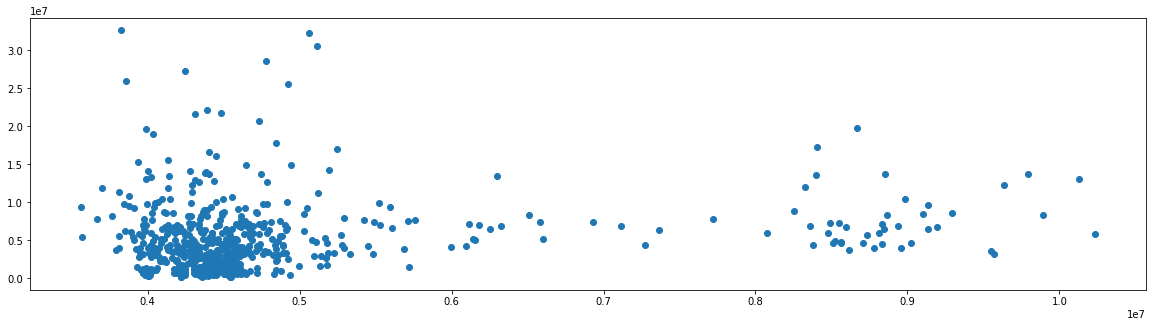

In [71]:
plt.figure(figsize=(20,5))
plt.scatter(lasso_predictions, y_test)

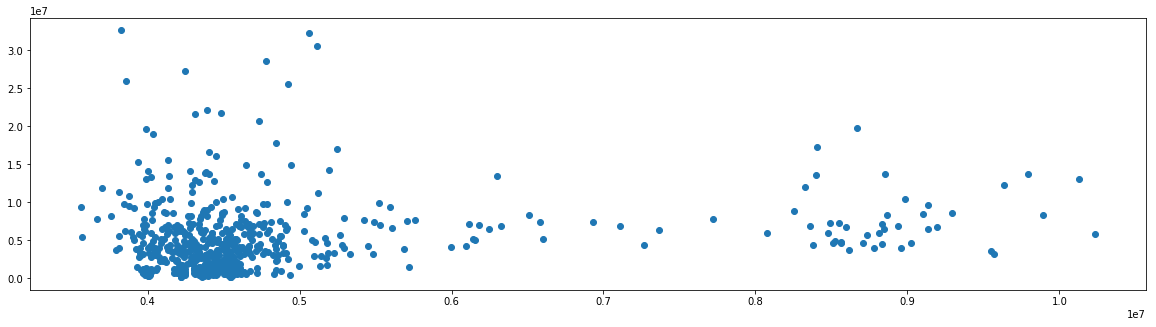

In [72]:
plt.figure(figsize=(20,5))
plt.scatter(slasso_predictions, y_test)

In [73]:
pd.DataFrame(lasso_model.coef_, index = X.columns)

,0
tweet_times_a_day,256400.106832
stock_price_delta,195837.637711
weekday_d_2.0,-75014.475116
weekday_d_3.0,-47293.839664
weekday_d_4.0,-130569.289712
weekday_d_5.0,-218141.249788
filings_d_10-K/A,-33934.031650
filings_d_10-Q,148710.892094
filings_d_424B5,-47472.846934
filings_d_425,13946.250942


In [74]:
import seaborn as sns

C:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


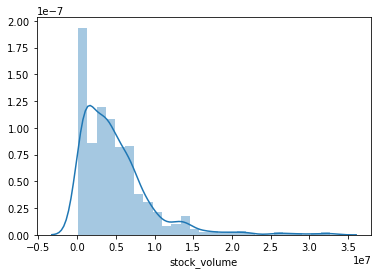

In [75]:
sns.distplot(y)

In [76]:
lasso_model.intercept_ # intercept = Monday

4841824.419561714

In [77]:
#dummies, week day int to string 1 = Monday
#dummy for sec filling,